In [24]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import cv2

from pipeline import load_image, save_image
from segmentation import threshold_segmentation, watershed_segmentation
from classification import classify_nuclei_by_brownness
import scipy.ndimage as ndi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


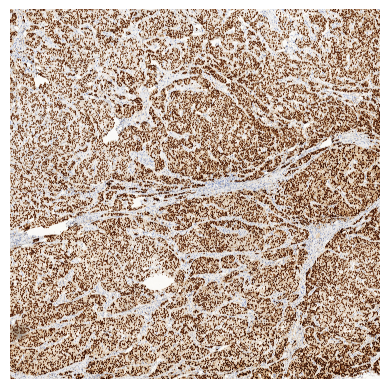

Image shape: (16384, 16384, 3)


In [2]:
image = load_image("../example/input.jpg")

plt.imshow(image)
plt.axis('off')
plt.show()

print("Image shape:", image.shape)

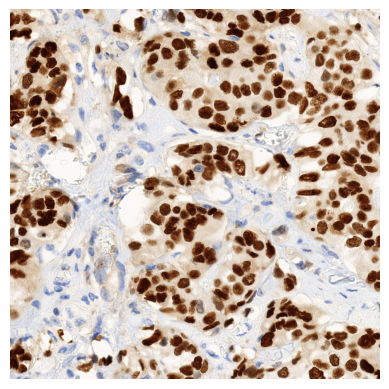

Image shape: (2000, 2000, 3)


In [3]:
crop_size = 2000
image_crop = image[:crop_size, :crop_size, :]

plt.imshow(image_crop)
plt.axis('off')
plt.show()

print("Image shape:", image_crop.shape)

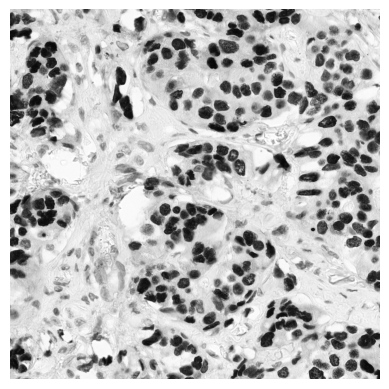

In [19]:
def to_grayscale(image: np.ndarray) -> np.ndarray:
    """
    Convert an RGB image to grayscale.
    
    Parameters:
        image (np.ndarray): RGB image (H, W, 3)
        
    Returns:
        np.ndarray: Grayscale image (H, W)
    """
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return gray

gray = to_grayscale(image_crop)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

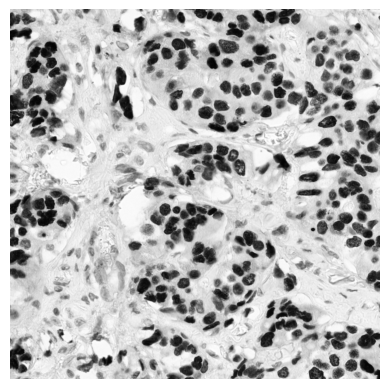

In [20]:
def smooth_image(gray: np.ndarray, kernel_size: int = 5) -> np.ndarray:
    """
    Apply Gaussian blur to a grayscale image.
    
    Parameters:
        gray (np.ndarray): Grayscale image
        kernel_size (int): Size of the Gaussian kernel
        
    Returns:
        np.ndarray: Smoothed image
    """
    blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
    return blurred

blurred = smooth_image(gray)
plt.imshow(blurred, cmap='gray')
plt.axis('off')
plt.show()

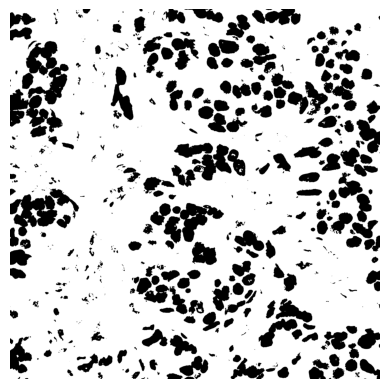

In [21]:
def threshold_image(gray: np.ndarray) -> np.ndarray:
    """
    Apply Otsu thresholding to grayscale image.
    
    Parameters:
        gray (np.ndarray): Grayscale image
        
    Returns:
        np.ndarray: Binary mask (nuclei = 1, background = 0)
    """
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Convert to 0 and 1
    binary = binary // 255
    return binary
binary = threshold_image(blurred)
plt.imshow(binary, cmap='gray')
plt.axis('off')
plt.show()

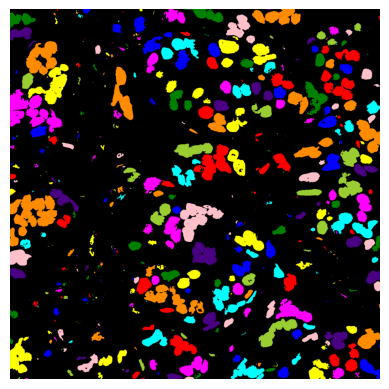

In [47]:
colored = threshold_segmentation(image_crop)

plt.imshow(colored)
plt.axis('off')
plt.show()

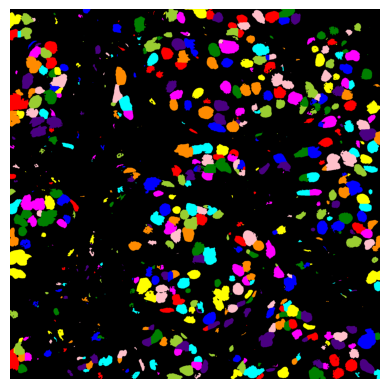

In [5]:
labeled, colored = watershed_segmentation(image_crop)

plt.imshow(colored)
plt.axis('off')
plt.show()

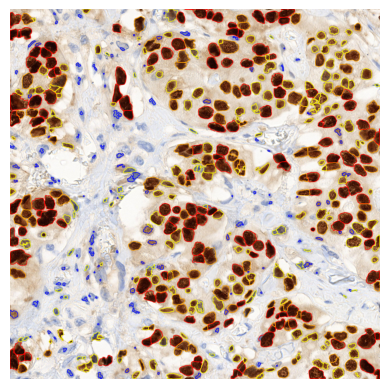

In [ ]:
classified = classify_nuclei_by_brownness(image_crop, labeled)
plt.imshow(classified)
plt.axis('off')
plt.show()

save_image("classified_output.jpg", classified)